In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')

# Set label and features
y = df['charges']
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['charges'])
X.head()

,age,bmi,children,const
0,19,27.900,0,1
1,18,33.770,1,1
2,28,33.000,3,1
3,33,22.705,0,1
4,32,28.880,0,1


In [2]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           8.80e-37
Time:                        14:09:55   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [5]:
df_insample = pd.DataFrame({'Actual':df['charges'],
                            'Predicted':model.fittedvalues,
                            'Residuals (Error)':df['charges'] - model.fittedvalues})

df_insample.head(10)

,Actual,Predicted,Residuals (Error)
0,16884.92400,6908.777533,9976.146467
1,1725.55230,9160.977061,-7435.424761
2,4449.46200,12390.946918,-7941.484918
3,21984.47061,8543.527095,13440.943515
4,3866.85520,10354.147396,-6487.292196
5,3756.62160,9071.411158,-5314.789558
6,8240.58960,15771.234831,-7530.645231
7,7281.50560,12804.138689,-5522.633089
8,6406.41070,12955.328269,-6548.917569
9,28923.13692,16064.459249,12858.677671


In [7]:
df_insample['Absolute Residual'] = abs(df_insample['Residuals (Error)'])
df_insample['Squared Residual'] = df_insample['Residuals (Error)']**2

df_insample.head()

,Actual,Predicted,Residuals (Error),Absolute Residual,Squared Residual
0,16884.92400,6908.777533,9976.146467,9976.146467,9.952350e+07
1,1725.55230,9160.977061,-7435.424761,7435.424761,5.528554e+07
2,4449.46200,12390.946918,-7941.484918,7941.484918,6.306718e+07
3,21984.47061,8543.527095,13440.943515,13440.943515,1.806590e+08
4,3866.85520,10354.147396,-6487.292196,6487.292196,4.208496e+07


In [9]:
print(f"MAE:\t{round(df_insample['Absolute Residual'].mean(), 4)}")
print(f"RMSE:\t{round(df_insample['Squared Residual'].mean() ** (1/2), 4)}")

MAE:	9015.4422
RMSE:	11355.3179


In [11]:
model.predict([32, 21, 2, 1])

array([8823.05978868])

In [13]:
import pandas as pd

df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')

# Manually enter column names to dummy code
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [15]:
df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')

# Loop through the columns and dummy code them one-at-a-time if they are not numeric
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = pd.get_dummies(df, columns=[col])

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [18]:
df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')

# Use .select_dtypes to idenfity all column names that are 'object' data type
dummies = df.select_dtypes(['object']).columns  # Creates a list of column names that are 'object' dtype
df = pd.get_dummies(df, columns=dummies)  # Dummy code everything in that list
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [22]:

df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')
df = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [27]:
print(f"MAE:\t{round(abs(model.fittedvalues - y).mean(), 4)}")
print(f"RMSE:\t{round(((model.fittedvalues - y)**2).mean() ** (1/2), 4)}")

MAE:	9015.4422
RMSE:	11355.3179


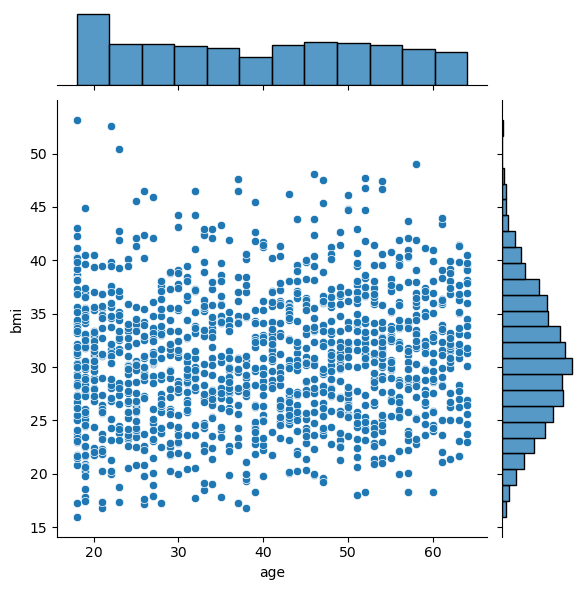

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/user/Desktop/python projects/insurance.csv')

# Generate dummy features
df = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns, drop_first=True)

# Visualize the data in a Seaborn jointplot
sns.jointplot(df, x="age", y="bmi");

In [31]:
from sklearn import preprocessing

# Converts the raw data for both features to a z-score and returns
# results in a numpy array of as many features as you input
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns)
df_zscore.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


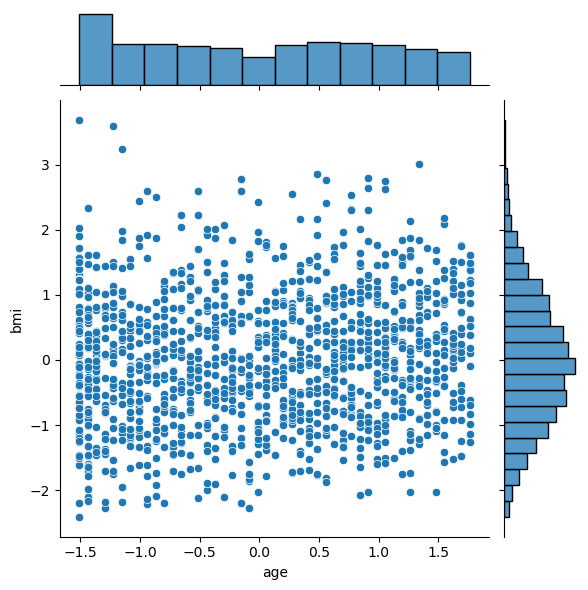

In [33]:
sns.jointplot(df_zscore, x="age", y="bmi");

In [35]:
print("Mean:\t" + str(df_zscore.charges.mean()))
print("Std:\t" + str(df_zscore.charges.std()))
print("Min:\t" + str(df_zscore.charges.min()))
print("Max:\t" + str(df_zscore.charges.max()))

Mean:	-8.098487832841202e-17
Std:	1.000373901676928
Min:	-1.003557345258499
Max:	4.17166316317004


In [37]:
# Min-Max Normalization
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


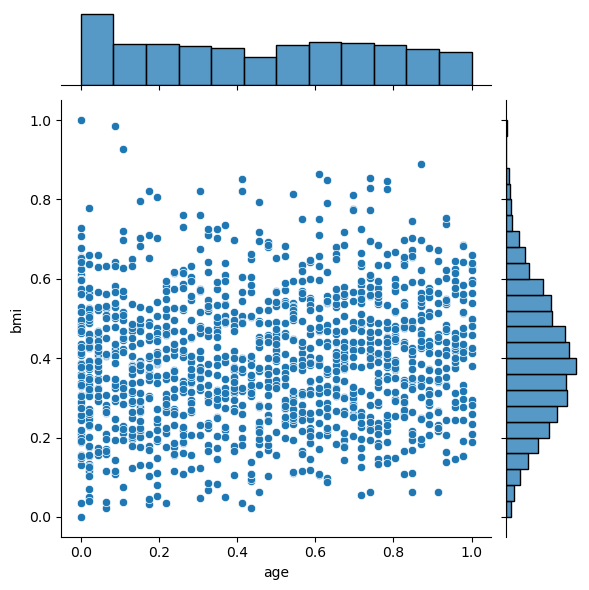

In [39]:
sns.jointplot(df_minmax, x="age", y="bmi");

In [41]:
print("Mean:\t" + str(df_minmax.charges.mean()))
print("Std:\t" + str(df_minmax.charges.std()))
print("Min:\t" + str(df_minmax.charges.min()))
print("Max:\t" + str(df_minmax.charges.max()))

Mean:	0.19391586186986068
Std:	0.19330072990081973
Min:	0.0
Max:	0.9999999999999999


In [43]:
import statsmodels.api as sm

y = df_minmax.charges
X = df_minmax.drop(columns=['charges']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:14:11   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1886      0.009  